<b><font size="6">|017|KNN|Iris Species Classification</font></b>

* **Author**: Dino Giovannoni
* **Date:**: 11-July-2024


In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from IPython.display import display

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier


from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

Import the dataset

In [2]:
df = pd.read_csv('IRIS.csv')

display(df.head())
display(df.info())

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


None

In [3]:
display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [4]:
all_vars = df.columns
output_var_name = "species"
features = all_vars.drop(output_var_name).to_list()

## Histogram Plots

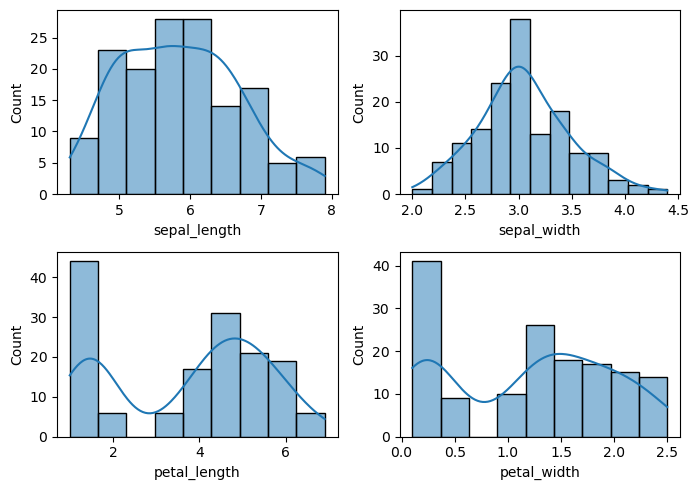

In [5]:
plt.figure(figsize=(7, 5))
for i, col in enumerate(features):
    plt.subplot(2, 2, i+1)
    sns.histplot(df[col], kde=True)
plt.tight_layout()
plt.show()

# Box Plots

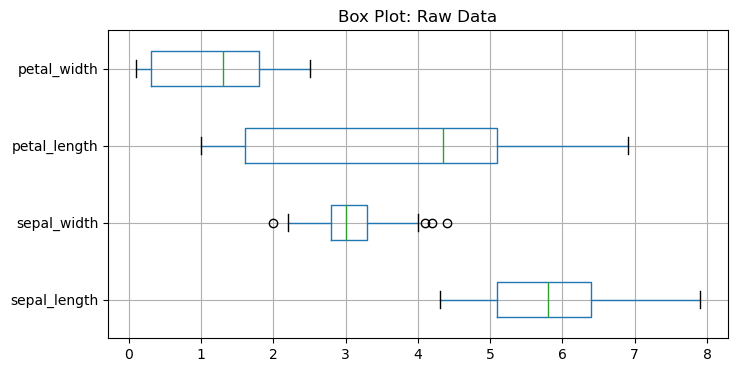

In [6]:
fig, ax = plt.subplots(figsize=(8, 4))
boxplot = df.boxplot(vert = 0, ax=ax)  
_ = ax.set_title(f'Box Plot: Raw Data')

## PairPlot

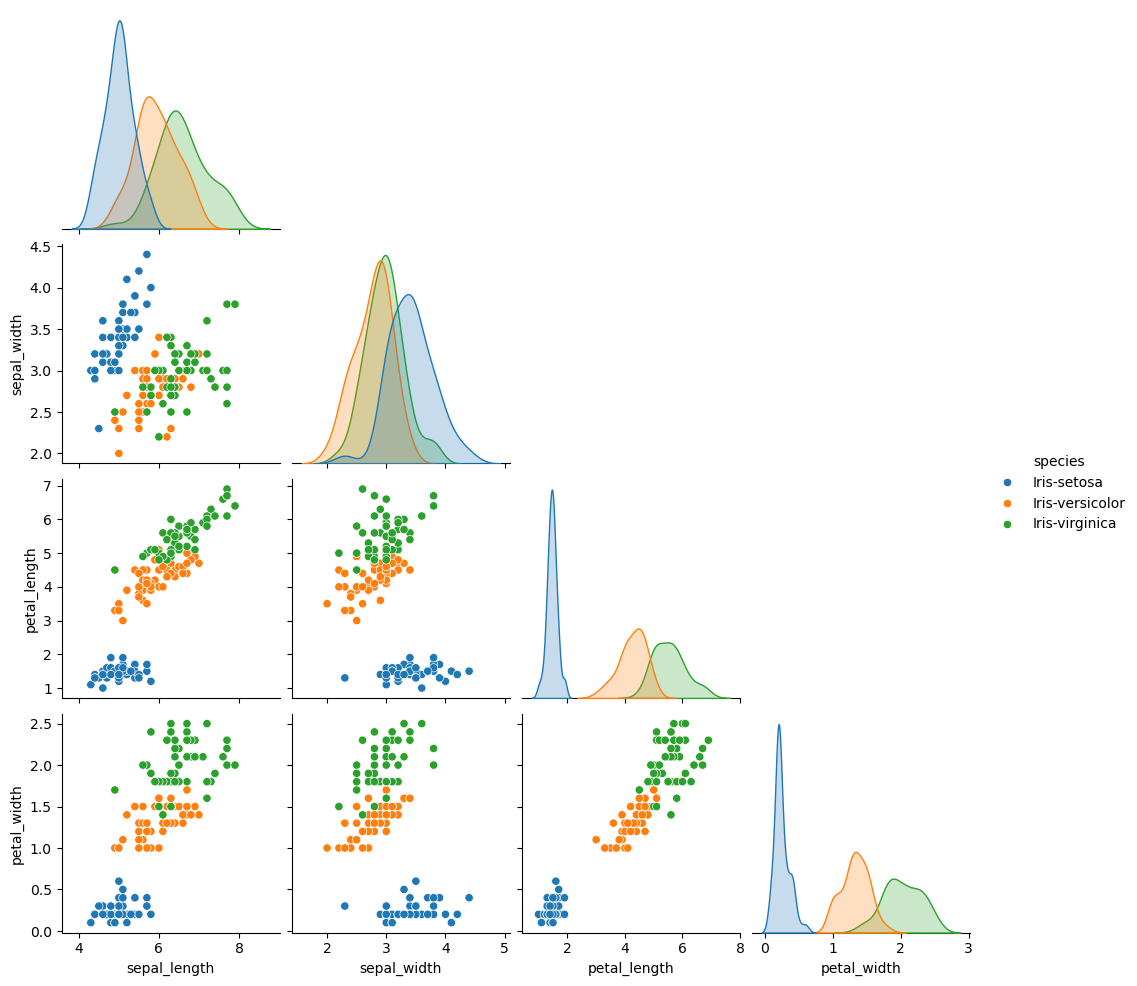

In [7]:
_ = sns.pairplot(data = df, hue="species",corner = True)

# Model

In [8]:
X = df[features]
y = df[output_var_name]
display(X.head(), y.head())

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: species, dtype: object

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 5)
display(X_train)

,sepal_length,sepal_width,petal_length,petal_width
40,5.0,3.5,1.3,0.3
115,6.4,3.2,5.3,2.3
142,5.8,2.7,5.1,1.9
69,5.6,2.5,3.9,1.1
17,5.1,3.5,1.4,0.3
...,...,...,...,...
8,4.4,2.9,1.4,0.2
73,6.1,2.8,4.7,1.2
144,6.7,3.3,5.7,2.5
118,7.7,2.6,6.9,2.3


## Fit KNN Model

In [10]:
model = KNeighborsClassifier(n_neighbors = 5)
model.fit(X_train, y_train)

y_test_pred = model.predict(X_test)

## The Confusion Matrix

### Test Data

[[12  0  0]
 [ 0 12  2]
 [ 0  0 12]]


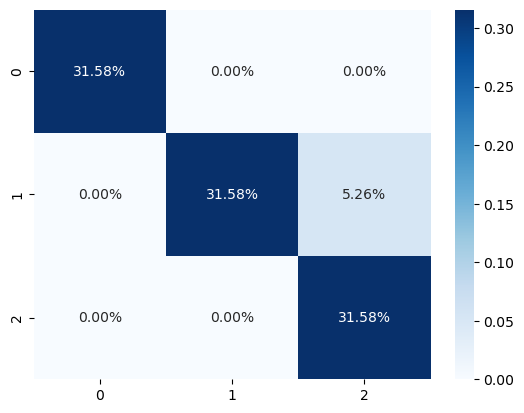

In [11]:
cm_test = confusion_matrix(y_test, y_test_pred)
print(cm_test)
_ = sns.heatmap(cm_test/np.sum(cm_test), annot=True,cmap='Blues', fmt='.2%')

In [12]:
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {np.round(100*test_accuracy, 1)}%')

Test Accuracy: 94.7%


## Different Value of k

In [13]:
kmin = 3
kmax = 15
kn = np.arange(kmin, kmax+1)
mean_acc = np.zeros(len(kn))
std_acc = np.zeros(len(kn))
error_rate = np.zeros(len(kn))


for n, k in enumerate(kn):
    
    #Train Model and Predict  
    knn = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)
    ypred = knn.predict(X_test)
    
    mean_acc[n] = accuracy_score(y_test, ypred)    
    std_acc[n]=np.std(ypred==y_test)/np.sqrt(ypred.shape[0])
    error_rate[n] = np.mean(ypred != y_test)
    # print(f'[{n}] {k} Accuracy: {mean_acc[n]} ')

print( "The best accuracy was with", mean_acc.max(), "with k=", kn[mean_acc.argmax()])

The best accuracy was with 1.0 with k= 8


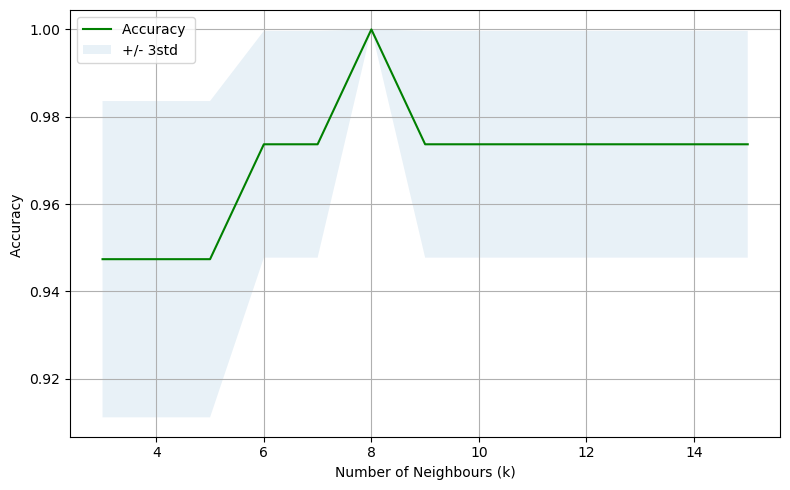

In [14]:
plt.figure(figsize=(8,5))
plt.plot(kn, mean_acc,'g')
plt.fill_between(kn, mean_acc - 1*std_acc, mean_acc + 1*std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3std'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbours (k)')
plt.tight_layout()
plt.grid()
plt.show()

Minimum error:  0.0 at k = 8


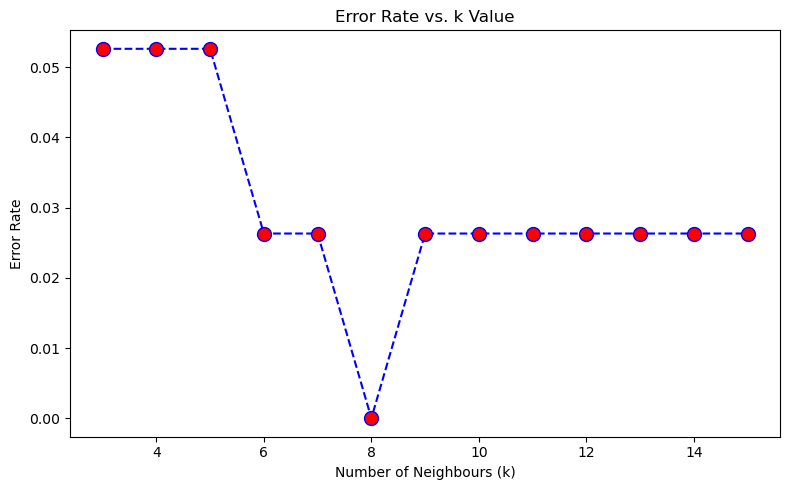

In [15]:
plt.figure(figsize=(8,5))
plt.plot(kn,error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. k Value')
plt.xlabel('Number of Neighbours (k)')
plt.ylabel('Error Rate')
plt.tight_layout()
print("Minimum error: ",min(error_rate),"at k =", kn[list(error_rate).index(min(error_rate))])